# Unità: notMNIST

Elaborazioni base sul dataset notMNIST e semplice classificazione basata su Logistic Regression

In [1]:
# import necessari

from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# IPython: With this backend, the output of plotting commands is displayed inline
%matplotlib inline

In [16]:
# suppongo di aver scaricato notMNIST_large.tar.gz e notMNIST_small.tar.gz
# decompressi in 2 directory notMNIST_large e notMNIST_small

train_folder = "DeepLearning/data/notMNIST_large/"
test_folder = "DeepLearning/data/notMNIST_small/"
num_classes = 10 # notMNIST labels

In [3]:
image_size = 28  # dimensione immagine dataset: 28x28 pixel
pixel_depth = 255.0 # scale di grigio

def load_images(folder, min_num_images):
    print ("load from %s" % folder)
    image_files = os.listdir(folder)
    # creo una matrice NUM_FILES x 28 x 28 di float per memorizzare il dataset
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
    num_images = 0
    for image in image_files:
        image_file = os.path.join(folder, image)
        # posso avere errori nella lettura delle immagini
        try:      
            # leggo una immagine e la memorizzo come matrice
            # opero anche la normalizzazione mean = 0 e standard deviation ~0.5
            image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
            if image_data.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
            # accodo al dataset l'immagine
            dataset[num_images, :, :] = image_data
            num_images = num_images + 1
        except IOError as e:
            print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
            
    # cropping della matrice conteggiando le immagini effettivamente lette
    dataset = dataset[0:num_images, :, :]
    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' % (num_images, min_num_images))
    
    print('Full dataset tensor:', dataset.shape)
    print('Mean:', np.mean(dataset))
    print('Standard deviation:', np.std(dataset))
    return dataset
        


In [6]:
# recupero tutte le sottodirectory del parametro directory

def list_subdirs(directory):
    data_folders = [os.path.join(directory, d) for d in sorted(os.listdir(directory)) if os.path.isdir(os.path.join(directory, d))]
    if len(data_folders) != num_classes:
        raise Exception('Expected %d folders, one per class. Found %d instead.' % (num_classes, len(data_folders)))
    # debug: print(data_folders)
    return data_folders

## PROBLEMA #1: FASE DI EXPLORATION 

Ho tanti dati, è opportuno dare un'occhiata veloce.

Vediamo come sono fatti prendiamone uno per folder e visualizziamoli.

In [20]:
train_subfolders = list_subdirs(train_folder)

for folder in train_subfolders:
    fn_images = os.listdir(folder)
    for file in fn_images[:1]:
        path = folder + os.sep + file
        print (path)
        display(Image(path))

DeepLearning/data/notMNIST_large/A/VmFkaW0ncyBXcml0aW5nLnR0Zg==.png


DeepLearning/data/notMNIST_large/B/VmFkaW0ncyBXcml0aW5nLnR0Zg==.png


DeepLearning/data/notMNIST_large/C/VmFkaW0ncyBXcml0aW5nLnR0Zg==.png


DeepLearning/data/notMNIST_large/D/VmFkaW0ncyBXcml0aW5nLnR0Zg==.png


DeepLearning/data/notMNIST_large/E/VmFkaW0ncyBXcml0aW5nLnR0Zg==.png


DeepLearning/data/notMNIST_large/F/VmFkaW0ncyBXcml0aW5nLnR0Zg==.png


DeepLearning/data/notMNIST_large/G/VmFkaW0ncyBXcml0aW5nLnR0Zg==.png


DeepLearning/data/notMNIST_large/H/VmFkaW0ncyBXcml0aW5nLnR0Zg==.png


DeepLearning/data/notMNIST_large/I/VmFkaW0ncyBXcml0aW5nLnR0Zg==.png


DeepLearning/data/notMNIST_large/J/VmFkaW0ncyBXcml0aW5nLnR0Zg==.png


In [21]:
# carica le immagini presenti nel data_folders e serializza la matrice corrispondente su un file con estensione .pickle

def serialize_folder_images(data_folders, min_num_images_per_class):
    dataset_names = []
    for folder in data_folders:

        set_filename = folder + '.pickle'
        if os.path.isfile(set_filename):
            print ('pickle file %s exists, so I skip it', set_filename)
            continue
        dataset_names.append(set_filename)
        dataset = load_images(folder, min_num_images_per_class)
        try:
            with open(set_filename, 'wb') as f:
                pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
        except Exception as e:
            print('Unable to save data to', set_filename, ':', e)
  
    return dataset_names

In [22]:
train_subfolders = list_subdirs(train_folder)
test_subfolders = list_subdirs(test_folder)
train_datasets = serialize_folder_images(train_subfolders, 45000)
test_datasets = serialize_folder_images(test_subfolders, 1800)
print ("done!")

load from DeepLearning/data/notMNIST_large/A


Could not read: DeepLearning/data/notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png : cannot identify image file 'DeepLearning/data/notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png' - it's ok, skipping.


Could not read: DeepLearning/data/notMNIST_large/A/.DS_Store : cannot identify image file 'DeepLearning/data/notMNIST_large/A/.DS_Store' - it's ok, skipping.


Could not read: DeepLearning/data/notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png : cannot identify image file 'DeepLearning/data/notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png' - it's ok, skipping.


Could not read: DeepLearning/data/notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png : cannot identify image file 'DeepLearning/data/notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png' - it's ok, skipping.


Full dataset tensor: (52909, 28, 28)
Mean: -0.12825
Standard deviation: 0.443121


load from DeepLearning/data/notMNIST_large/B


Could not read: DeepLearning/data/notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png : cannot identify image file 'DeepLearning/data/notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png' - it's ok, skipping.


Full dataset tensor: (52911, 28, 28)
Mean: -0.00756303
Standard deviation: 0.454491


load from DeepLearning/data/notMNIST_large/C


Full dataset tensor: (52912, 28, 28)
Mean: -0.142258
Standard deviation: 0.439806


load from DeepLearning/data/notMNIST_large/D


Could not read: DeepLearning/data/notMNIST_large/D/VHJhbnNpdCBCb2xkLnR0Zg==.png : cannot identify image file 'DeepLearning/data/notMNIST_large/D/VHJhbnNpdCBCb2xkLnR0Zg==.png' - it's ok, skipping.


Full dataset tensor: (52911, 28, 28)
Mean: -0.0573677
Standard deviation: 0.455647


load from DeepLearning/data/notMNIST_large/E


Full dataset tensor: (52912, 28, 28)
Mean: -0.069899
Standard deviation: 0.452941


load from DeepLearning/data/notMNIST_large/F


Full dataset tensor: (52912, 28, 28)
Mean: -0.125583
Standard deviation: 0.447089


load from DeepLearning/data/notMNIST_large/G


Full dataset tensor: (52912, 28, 28)
Mean: -0.0945816
Standard deviation: 

0.44624
load from DeepLearning/data/notMNIST_large/H


Full dataset tensor: (52912, 28, 28)
Mean: -0.0685221
Standard deviation: 

0.454232
load from DeepLearning/data/notMNIST_large/I


Full dataset tensor: (52912, 28, 28)
Mean: 0.0307863
Standard deviation: 0.468898


load from DeepLearning/data/notMNIST_large/J


Full dataset tensor: (52911, 28, 28)
Mean: -0.153358
Standard deviation: 0.443656


load from DeepLearning/data/notMNIST_small/A
Could not read: DeepLearning/data/notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png : cannot identify image file 'DeepLearning/data/notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png' - it's ok, skipping.


Full dataset tensor: (1872, 28, 28)
Mean: -0.132626
Standard deviation: 0.445128
load from DeepLearning/data/notMNIST_small/B


Full dataset tensor: (1873, 28, 28)
Mean: 0.00535608
Standard deviation: 0.457115
load from DeepLearning/data/notMNIST_small/C


Full dataset tensor: (1873, 28, 28)
Mean: -0.141521
Standard deviation: 0.44269
load from DeepLearning/data/notMNIST_small/D


Full dataset tensor: (1873, 28, 28)
Mean: -0.0492167
Standard deviation: 0.459759
load from DeepLearning/data/notMNIST_small/E


Full dataset tensor: (1873, 28, 28)
Mean: -0.0599148
Standard deviation: 0.45735
load from DeepLearning/data/notMNIST_small/F


Could not read: DeepLearning/data/notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png : cannot identify image file 'DeepLearning/data/notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png' - it's ok, skipping.


Full dataset tensor: (1872, 28, 28)
Mean: -0.118185
Standard deviation: 0.452279
load from DeepLearning/data/notMNIST_small/G


Full dataset tensor: (1872, 28, 28)
Mean: -0.0925503
Standard deviation: 0.449006
load from DeepLearning/data/notMNIST_small/H


Full dataset tensor: (1872, 28, 28)
Mean: -0.0586892
Standard deviation: 0.458759
load from DeepLearning/data/notMNIST_small/I


Full dataset tensor: (1872, 28, 28)
Mean: 0.0526451
Standard deviation: 0.471894
load from DeepLearning/data/notMNIST_small/J


Full dataset tensor: (1872, 28, 28)
Mean: -0.151689
Standard deviation: 0.448014
done!


## PROBLEMA #2: VISUALIZZAZIONE

Ora prova a visualizzare i dati a partire dagli oggetti ndarray

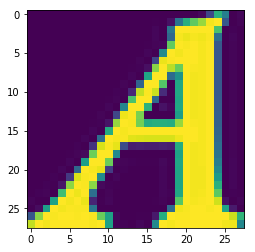

In [23]:
# prendo il fn del pickle relativo al label A

pickle_file = train_datasets[0]  

with open(pickle_file, 'rb') as f:        
    # unpickle
    letter_set = pickle.load(f)  
    # prendo in indice a caso
    sample_idx = np.random.randint(len(letter_set))    
    # estraggo la matrice relativa all'indice
    sample_image = letter_set[sample_idx, :, :]  
    plt.figure()
    
    plt.imshow(sample_image)  

## PROBLEMA #3: BILANCIAMENTO 

Nella classificazione multiclass è opportuno avere un dataset bilanciato verifica che il numero di file per label sia più o meno lo stesso

In [24]:
for pickle_file in train_datasets:
    with open(pickle_file, 'rb') as f:        
        # unpickle
        letter_set = pickle.load(f)  
        print("pickle file ", pickle_file, " contains ", len(letter_set), " samples")

pickle file  DeepLearning/data/notMNIST_large/A.pickle  contains  52909  samples


pickle file  DeepLearning/data/notMNIST_large/B.pickle  contains  52911  samples


pickle file  DeepLearning/data/notMNIST_large/C.pickle  contains  52912  samples


pickle file  DeepLearning/data/notMNIST_large/D.pickle  contains  52911  samples


pickle file  DeepLearning/data/notMNIST_large/E.pickle  contains  52912  samples


pickle file  DeepLearning/data/notMNIST_large/F.pickle  contains  52912  samples


pickle file  DeepLearning/data/notMNIST_large/G.pickle  contains  52912  samples


pickle file  DeepLearning/data/notMNIST_large/H.pickle  contains  52912  samples


pickle file  DeepLearning/data/notMNIST_large/I.pickle  contains  52912  samples


pickle file  DeepLearning/data/notMNIST_large/J.pickle  contains  52911  samples


In [25]:
# crea una matrice di double per il dataset, e un array di int per i label, di dimensioni nb_rows x nb_rows e nb_rows rispettivamente

def make_arrays(nb_rows, img_size):
    if nb_rows:
        dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
        labels = np.ndarray(nb_rows, dtype=np.int32)
    else:
        dataset, labels = None, None
    return dataset, labels


In [26]:
# fa il merge dei pickle files 
# il merge ottenuto lo suddivide in due datasets: uno per il training e uno per la validazione
# il primo ha dimensione train_size e il secondo valid_size

def merge_pickles(pickle_files, train_size, valid_size=0):
	num_classes = len(pickle_files)
	valid_dataset, valid_labels = make_arrays(valid_size, image_size)
	train_dataset, train_labels = make_arrays(train_size, image_size)
    
    # numero di istanze da considerare (fisso) per label 
	valid_size_per_class = valid_size // num_classes
	train_size_per_class = train_size // num_classes
		
	start_v, start_t = 0, 0
	end_v, end_t = valid_size_per_class, train_size_per_class
	end_l = valid_size_per_class+train_size_per_class
    
    # itera sui pickle files insieme a un contatore (label)
	for label, pickle_file in enumerate(pickle_files):			 
		try:
			with open(pickle_file, 'rb') as f:
				letter_set = pickle.load(f)
				
				# faccio uno shuffle del dataset, perche'? 
				np.random.shuffle(letter_set)
				if valid_dataset is not None:
                    
                    # di tutto il pickle prendo solo valid_size_per_class istanze
					valid_letter = letter_set[:valid_size_per_class, :, :]
					valid_dataset[start_v:end_v, :, :] = valid_letter
					valid_labels[start_v:end_v] = label
					start_v += valid_size_per_class
					end_v += valid_size_per_class
										
				train_letters = letter_set[valid_size_per_class:end_l, :, :]
				train_dataset[start_t:end_t, :, :] = train_letters
				train_labels[start_t:end_t] = label
				start_t += train_size_per_class
				end_t += train_size_per_class
		except Exception as e:
			print('Unable to process data from', pickle_file, ':', e)
			raise
		
	return valid_dataset, valid_labels, train_dataset, train_labels

Definiamo le dimensioni dei dataset per il training, la validazione e il test

In [27]:
train_size = 200000
valid_size = 10000
test_size = 10000

In [28]:
valid_dataset, valid_labels, train_dataset, train_labels = merge_pickles(
                                                            train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_pickles(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


In [29]:
# dato un dataset e i corrispondenti labels, fa un nuovo shuffle (fondamentale per l'apprendimento)

def randomize(dataset, labels):
    
    # restituisce un array contenente le permutazioni del numero dato in input
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels

train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

In [31]:
# salviamo i dataset su un singolo file

pickle_file = "DeepLearning/data/notMNIST.pickle"

try:
    f = open(pickle_file, 'wb')
    save = {
        'train_dataset': train_dataset,
        'train_labels': train_labels,
        'valid_dataset': valid_dataset,
        'valid_labels': valid_labels,
        'test_dataset': test_dataset,
        'test_labels': test_labels,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise


In [32]:
statinfo = os.stat(pickle_file)
print('pickle size:', statinfo.st_size)

pickle size: 690800441


## PROBLEMA #4: OVERLAP

Valutare la possibilità di overlap (stesse immagini) tra i datasets di training, validation e test 

In [33]:
# Controllo se sto utilizzando la stessa immagine piu' volte e nel caso la elimino

def check_overlaps(images1, images2):
    images1.flags.writeable=False
    images2.flags.writeable=False
    
    # Python v2
    hash1 = set([hash(image1.data) for image1 in images1])
    hash2 = set([hash(image2.data) for image2 in images2])
    # Python v3
    #hash1 = set([hash(image1.tobytes()) for image1 in images1])
    #hash2 = set([hash(image2.tobytes()) for image2 in images2])
    
    all_overlaps = set.intersection(hash1, hash2)
    return all_overlaps

In [34]:
r = check_overlaps(train_dataset, test_dataset)    
print('Number of overlaps between training and test sets: ', len(r))

Number of overlaps between training and test sets:  1144


## PROBLEMA #5

Prova ad addestrare un classificatore della libreria ML sklearn 

Magari trovi una soluzione soddisfacente

Ti consiglio di partire da poche istanze di training, es. 50, 100, 1000

## PROBLEMA #6

Come mai il data shuffle è così importante?

In quali circostanze l'assenza di shuffle può diminuire l'accuratezza? 

In quali altre circostanze lo shuffle può essere inutile?